<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/ideal_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=vOidgRVlesk

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [ ]:
num_particles = 100
container_size = 10
time_steps = 1000
particles_speed = 0.2

positions = np.random.rand(num_particles, 2) * container_size
velocities = np.random.rand(num_particles, 2) * particles_speed

collisions_array = []
positions_array = []

for step in range(time_steps):
    positions += velocities
    positions_array.append(positions.copy())
    n_collision = 0

    for i in range(num_particles):
        for j in range(2):
            if positions[i, j] < 0 or positions[i, j] > container_size:
                velocities[i, j] *= -1
                n_collision += 1

    collisions_array.append(n_collision)

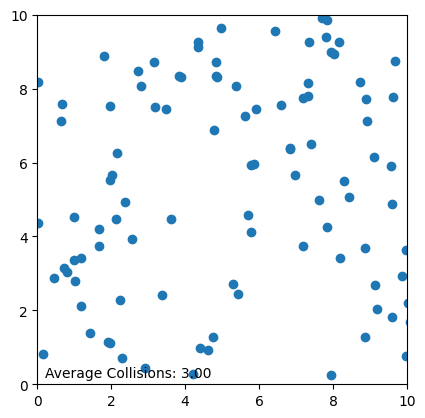

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(positions[:, 0], positions[:, 1], marker='o')
ax.set_xlim(0, container_size)
ax.set_ylim(0, container_size)
text = plt.text(0.2, 0.2, '')
plt.gca().set_aspect('equal', adjustable='box')

def animate(i):
    scatter.set_offsets(positions_array[i])
    text.set_text(f"Average Collisions: {np.average(collisions_array[i]):.2f}")

ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('ideal_gas.gif', writer='pillow', fps=30)